## Step-1:  Input the required libraries

In [1]:
from numpy import load
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Step-2: Load the dataset after loading the dataset, you have to normalize every image.

In [2]:
data = load('C:/Users/Reverie-PC/adl/datasets/ORL_faces.npz')
lst = data.files

# for item in lst:
#     print(item)
#     print(data[item])

In [3]:
lst

['testY', 'testX', 'trainX', 'trainY']

In [4]:
# (y_test, X_test, X_train, y_train) = lst
X_train = data['trainX']
X_test = data['testX']
y_train = data['trainY']
y_test = data['testY']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 10304), (160, 10304), (240,), (160,))

In [5]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.


In [6]:
# show tSequentialtrain and test Data format

print('X_train shape: {}'.format(X_train.shape))
print('y-train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (240, 10304)
y-train shape: (240,)
X_test shape: (160, 10304)
y_test shape: (160,)


## Step-3: Split the datasets

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=1234)

## Step-4: Transform the images to equal sizes to feed in CNN

In [8]:
image_row = 112
image_col = 92
batch_size = 512

image_shape = (image_row, image_col, 1)

# Changing the size of image

X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *image_shape)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))

print('y_train shape: {}'.format(y_train.shape[0]))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (228, 112, 92, 1)
x_test shape: (160, 112, 92, 1)
y_train shape: 228
y_test shape: (160,)


## Step-5 

## Build a CNN model that has 3 main layers:
##### i. Convolutional Layer
##### ii. Pooling Layer
##### iii. Fully Connected Layer

In [9]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(254, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2024, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(40, activation='softmax'))

# Compile the model

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [11]:
model.summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 254)       292862    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 254)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 9, 254)        0

## Step-6: Train the model

In [12]:
history = model.fit(np.array(X_train), np.array(y_train),
                   validation_data=(np.array(X_valid), np.array(y_valid)),
                   epochs=250,
                   batch_size=512,
                   verbose=1)

Epoch 1/250
1/1 [==============================] - 4s 4s/step - loss: 3.6872 - accuracy: 0.0526 - val_loss: 3.6809 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 [==============================] - 3s 3s/step - loss: 3.6707 - accuracy: 0.0746 - val_loss: 3.6703 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 [==============================] - 3s 3s/step - loss: 3.6513 - accuracy: 0.0482 - val_loss: 3.6527 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 [==============================] - 3s 3s/step - loss: 3.6163 - accuracy: 0.0526 - val_loss: 3.6298 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 [==============================] - 4s 4s/step - loss: 3.5721 - accuracy: 0.0614 - val_loss: 3.6020 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 [==============================] - 4s 4s/step - loss: 3.5142 - accuracy: 0.0570 - val_loss: 3.5691 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 [==============================] - 4s 4s/step - loss: 3.4531 - accuracy: 0.0482 - val_loss: 3.5383 - val_accuracy: 0.0000e+00
Epoch 

In [13]:
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=1)

print('test loss: ', score[0])
print('test acc: ', score[1])

5/5 [==============================] - 1s 216ms/step - loss: 0.3137 - accuracy: 0.9500
test loss:  0.3136693239212036
test acc:  0.949999988079071


## Step-7: Plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


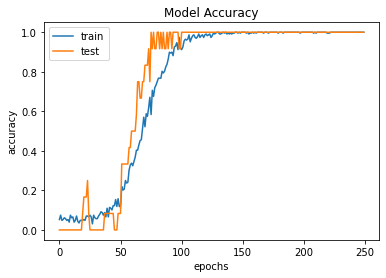

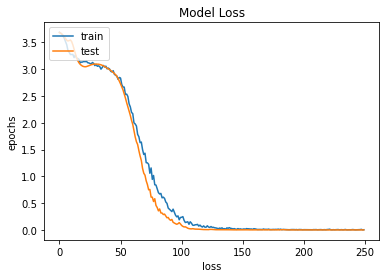

In [14]:
# list all the data in history
print(history.history.keys())

# Summarising history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarizing the history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()